In [2]:
import pandas as pd 
import numpy as np 
import yfinance as yf

#monthly - from 1991
housing_df = pd.read_csv('HPI_master.csv')
housing_df = housing_df[housing_df['level'].str.lower().str.contains('usa')]
housing_df = housing_df[housing_df['place_name'] == 'United States']
housing_df = housing_df[housing_df['frequency'] == 'monthly']
housing_df = housing_df.drop('index_nsa', axis=1)
housing_df = housing_df.reset_index(drop=True)
housing_df['Date'] = pd.to_datetime(housing_df['yr'].astype(str) + '-' + housing_df['period'].astype(str), format='%Y-%m')
housing_df = housing_df.loc[housing_df['Date'] >= '11/01/1998']

# Drop the original 'Year' and 'Month' columns if needed
final_housing_df = housing_df.drop(['yr', 'period'], axis=1)
final_housing_df = housing_df[['Date', 'index_sa']]
final_housing_df = final_housing_df.reset_index(drop=True)

final_housing_df

,Date,index_sa
0,1998-11-01,127.11
1,1998-12-01,127.68
2,1999-01-01,128.41
3,1999-02-01,128.93
4,1999-03-01,129.51
...,...,...
295,2023-06-01,405.84
296,2023-07-01,409.17
297,2023-08-01,412.13
298,2023-09-01,414.94


In [3]:
# Assuming the current date is 2024-01-03
end_date = pd.to_datetime("2023-12-31")

# Generate the date range from January 1998 to the present
date_range = pd.date_range(start="1998-01-01", end=end_date, freq="MS")

# Extract month-year combinations with numeric months
month_year_combinations = date_range.strftime('%m-%Y')

data_list = [
    2.2, 2.3, 2.1, 2.1, 2.2, 2.2, 2.2, 2.5, 2.5, 2.3, 2.3, 2.4, 
    2.4, 2.1, 2.1, 2.2, 2.0, 2.1, 2.1, 1.9, 2.0, 2.1, 2.1, 1.9, 
    2.0, 2.2, 2.4, 2.3, 2.4, 2.5, 2.5, 2.6, 2.6, 2.5, 2.6, 2.6, 
    2.6, 2.7, 2.7, 2.6, 2.5, 2.7, 2.7, 2.7, 2.6, 2.6, 2.8, 2.7, 
    2.6, 2.6, 2.4, 2.5, 2.5, 2.3, 2.2, 2.4, 2.2, 2.2, 2.0, 1.9, 
    1.9, 1.7, 1.7, 1.5, 1.6, 1.5, 1.5, 1.3, 1.2, 1.3, 1.1, 1.1, 
    1.1, 1.2, 1.6, 1.8, 1.7, 1.9, 1.8, 1.7, 2.0, 2.0, 2.2, 2.2,
    2.3, 2.4, 2.3, 2.2, 2.2, 2.0, 2.1, 2.1, 2.0, 2.1, 2.1, 2.2,
    2.1, 2.1, 2.1, 2.3, 2.4, 2.6, 2.7, 2.8, 2.9, 2.7, 2.6, 2.6,
    2.7, 2.7, 2.5, 2.3, 2.2, 2.2, 2.2, 2.1, 2.1, 2.2, 2.3, 2.4,
    2.5, 2.3, 2.4, 2.3, 2.3, 2.4, 2.5, 2.5, 2.5, 2.2, 2.0, 1.8,
    1.7, 1.8, 1.8, 1.9, 1.8, 1.7, 1.5, 1.4, 1.5, 1.7, 1.7, 1.8,
    1.6, 1.3, 1.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.6, 0.8, 0.8,
    1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0, 2.0, 2.1, 2.2, 2.2,
    2.3, 2.2, 2.3, 2.3, 2.3, 2.2, 2.1, 1.9, 2.0, 2.0, 1.9, 1.9,
    1.9, 2.0, 1.9, 1.7, 1.7, 1.6, 1.7, 1.8, 1.7, 1.7, 1.7, 1.7,
    1.6, 1.6, 1.7, 1.8, 2.0, 1.9, 1.9, 1.7, 1.7, 1.8, 1.7, 1.6,
    1.6, 1.7, 1.8, 1.8, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.1,
    2.2, 2.3, 2.2, 2.1, 2.2, 2.2, 2.2, 2.3, 2.2, 2.1, 2.1, 2.2,
    2.3, 2.2, 2.0, 1.9, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7, 1.8,
    1.8, 1.8, 2.1, 2.1, 2.2, 2.3, 2.4, 2.2, 2.2, 2.1, 2.2, 2.2,
    2.2, 2.1, 2.0, 2.1, 2.0, 2.1, 2.2, 2.4, 2.4, 2.3, 2.3, 2.3,
    2.3, 2.4, 2.1, 1.4, 1.2, 1.2, 1.6, 1.7, 1.7, 1.6, 1.6, 1.6,
    1.4, 1.3, 1.6, 3.0, 3.8, 4.5, 4.3, 4.0, 4.0, 4.6, 4.9, 5.5,
    6.0, 6.4, 6.5, 6.2, 6.0, 5.9, 5.9, 6.3, 6.6, 6.3, 6.0, 5.7,
    5.6, 5.5, 5.6, 5.5, 5.3, 4.8, 4.7, 4.3, 4.1, 4.0, 4.0, 0.0
]

# Now, you can use the data_list as needed.
inflation_df = pd.DataFrame({'Date': month_year_combinations, 'Inflation': data_list})

In [4]:
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'])
final_housing_df['Date'] = pd.to_datetime(final_housing_df['Date'])

# Merge DataFrames based on the 'Date' column
merged_df = pd.merge(inflation_df, final_housing_df, on='Date')

# Display the merged DataFrame
print(merged_df)

          Date  Inflation  index_sa
0   1998-11-01        2.3    127.11
1   1998-12-01        2.4    127.68
2   1999-01-01        2.4    128.41
3   1999-02-01        2.1    128.93
4   1999-03-01        2.1    129.51
..         ...        ...       ...
295 2023-06-01        4.8    405.84
296 2023-07-01        4.7    409.17
297 2023-08-01        4.3    412.13
298 2023-09-01        4.1    414.94
299 2023-10-01        4.0    416.26

[300 rows x 3 columns]


In [5]:
#weekly from 1990 
ten_year_yield_df = pd.read_csv('10-year-yield.csv')
yield_df = ten_year_yield_df.iloc[::-1]
yield_df = yield_df.reset_index(drop=True)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_after1998_df = yield_df.loc[yield_df['Date'] >= '11/24/1998']
new_yield_df = yield_after1998_df.reset_index(drop=True)

new_yield_df['Date'] = new_yield_df['Date'].dt.strftime('%Y-%m-%d')


spyticker = yf.Ticker("SPY")
SPY_df = spyticker.history(period="max", interval="1wk", start="1998-11-29", end="2024-01-03" , auto_adjust=True, rounding=True)
SPY_df = SPY_df.drop(['Dividends', 'Stock Splits', 'Capital Gains'], axis=1)
SPY_df.index = SPY_df.index.strftime('%Y-%m-%d')
new_SPY = SPY_df.reset_index()


new_SPY.head()
#only important column is spy close 
#data from 1998 starts 11-30 1998

,Date,Open,High,Low,Close,Volume
0,1998-11-30,75.76,75.99,73.26,75.35,47636300
1,1998-12-07,75.15,76.22,73.56,74.55,33885300
2,1998-12-14,73.94,75.83,72.41,75.43,38130000
3,1998-12-21,76.16,78.71,76.00,78.35,23339900
4,1998-12-28,78.71,79.67,77.91,78.75,21740600


In [6]:
result = pd.merge(new_yield_df, new_SPY, left_index=True, right_index=True)
result = result.drop(['Open_x', 'High_x', 'Low_x', 'Date_x','High_y', 'Low_y', 'Volume' ], axis=1)

# Rename columns
result.rename(columns={'Date_y': 'Date', 'Open_y': 'SPY Open', 'Close': 'SPY Close'}, inplace=True)
new_order = ['Date', 'Price', 'Change %', 'SPY Open', 'SPY Close']

# Rearrange the order of columns
result = result[new_order]


In [244]:
result
#merged_df

,Date,Price,Change %,SPY Open,SPY Close
0,1998-11-30,4.631,-3.72%,75.76,75.35
1,1998-12-07,4.623,-0.17%,75.15,74.55
2,1998-12-14,4.567,-1.21%,73.94,75.43
3,1998-12-21,4.850,6.20%,76.16,78.35
4,1998-12-28,4.658,-3.96%,78.71,78.75
...,...,...,...,...,...
1305,2023-12-04,4.229,0.49%,453.76,458.34
1306,2023-12-11,3.915,-7.44%,457.83,467.43
1307,2023-12-18,3.901,-0.36%,470.98,473.65
1308,2023-12-25,3.866,-0.89%,474.07,475.31


In [7]:
start_date = '1998-11-29'
end_date = pd.to_datetime('today')

# Generate a date range with weekly frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='W-Mon')

# Create a DataFrame with the date range
df = pd.DataFrame({'Date': date_range})
df['Date'] = pd.to_datetime(df['Date'])
df['Inflation'] = None
df['index_sa'] = None

In [8]:

for index1, row1 in df.iterrows(): 
    for index2, row2 in merged_df.iterrows(): 
        if(row2['Date'].year == row1['Date'].year) & (row1['Date'].month == row2['Date'].month): 
            df.at[index1, 'Inflation'] = row2['Inflation']
            df.at[index1, 'index_sa'] = row2['index_sa']


In [36]:
filtered_df = df[df['Date'] <= '2023-11-01']
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
result['Date'] = pd.to_datetime(result['Date'])

final_df = pd.merge(filtered_df, result, on='Date')

/var/folders/51/vyctx_xn0rd020p94qqhc00r0000gn/T/ipykernel_63216/3974881056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


,index,Date,Inflation,index_sa,Price,Change %,SPY Open,SPY Close
0,0,1998-11-30,2.3,127.11,4.631,-3.72%,75.76,75.35
1,1,1998-12-07,2.4,127.68,4.623,-0.17%,75.15,74.55
2,2,1998-12-14,2.4,127.68,4.567,-1.21%,73.94,75.43
3,3,1998-12-21,2.4,127.68,4.850,6.20%,76.16,78.35
4,4,1998-12-28,2.4,127.68,4.658,-3.96%,78.71,78.75
...,...,...,...,...,...,...,...,...
1296,1296,2023-10-02,4.0,416.26,4.795,4.70%,424.90,427.81
1297,1297,2023-10-09,4.0,416.26,4.616,-3.71%,425.85,429.76
1298,1298,2023-10-16,4.0,416.26,4.914,6.44%,432.07,419.49
1299,1299,2023-10-23,4.0,416.26,4.845,-1.39%,417.92,409.02


In [251]:
final_df

,Date,Inflation,index_sa,Price,Change %,SPY Open,SPY Close
0,1998-11-30,2.3,127.11,4.631,-3.72%,75.76,75.35
1,1998-12-07,2.4,127.68,4.623,-0.17%,75.15,74.55
2,1998-12-14,2.4,127.68,4.567,-1.21%,73.94,75.43
3,1998-12-21,2.4,127.68,4.850,6.20%,76.16,78.35
4,1998-12-28,2.4,127.68,4.658,-3.96%,78.71,78.75
...,...,...,...,...,...,...,...
1296,2023-10-02,4.0,416.26,4.795,4.70%,424.90,427.81
1297,2023-10-09,4.0,416.26,4.616,-3.71%,425.85,429.76
1298,2023-10-16,4.0,416.26,4.914,6.44%,432.07,419.49
1299,2023-10-23,4.0,416.26,4.845,-1.39%,417.92,409.02


In [263]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop the 'Date' column as it's not relevant for clustering
df_cluster = final_df.drop(['Date', 'Change %'], axis=1)

# Standardize the data (important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Choose the number of clusters (you can adjust this based on your needs)
num_clusters = 6


In [ ]:
# Fit K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
final_df['cluster'] = kmeans.fit_predict(df_scaled)

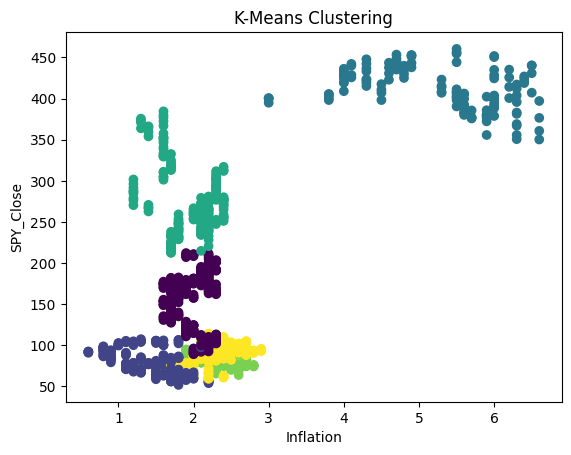

Cluster Centers:
   Inflation    index_sa     Price    SPY Open   SPY Close       cluster
0   1.949320  205.936803  2.132524  153.665578  153.960408  3.000000e+00
1   1.428125  182.131964  3.447897   78.587098   78.727589  1.332268e-15
2   5.215556  381.662519  2.841533  411.685407  412.184296  1.000000e+00
3   1.926829  271.142000  1.986722  271.771415  272.454878  3.000000e+00
4   2.402094  143.987435  5.452874   83.445654   83.320628  2.000000e+00
5   2.266667  208.320397  4.371266   90.454802   90.393651  6.439294e-15


In [265]:

# Visualize the clusters (using 2D scatter plot, adjust as needed)
plt.scatter(final_df['Inflation'], final_df['SPY Close'], c=final_df['cluster'], cmap='viridis')
plt.xlabel('Inflation')
plt.ylabel('SPY_Close')
plt.title('K-Means Clustering')
plt.show()

# Print the cluster centers (centroid values)
print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_cluster.columns))

In [37]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

numerical_columns = ["Inflation", "index_sa", "Price", "SPY Open", "SPY Close"]

# Create a StandardScaler instance
#scaler = StandardScaler()

# Apply standardization to the numerical columns
#final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

# Assuming final_df is your DataFrame
features = ["Inflation", "index_sa", "Price"]
target = "SPY Close"

# Split the data into training and testing sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])


In [39]:
# Define the neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_df[features], train_df[target], epochs=40, batch_size=8, validation_data=(test_df[features], test_df[target]))

Epoch 1/40
130/130 [==============================] - 1s 2ms/step - loss: 37377.1523 - val_loss: 38567.8398
Epoch 2/40
130/130 [==============================] - 0s 1ms/step - loss: 24838.6484 - val_loss: 13384.7119
Epoch 3/40
130/130 [==============================] - 0s 2ms/step - loss: 3931.1919 - val_loss: 1286.5326
Epoch 4/40
130/130 [==============================] - 0s 1ms/step - loss: 931.5012 - val_loss: 941.5428
Epoch 5/40
130/130 [==============================] - 0s 2ms/step - loss: 726.2322 - val_loss: 745.2856
Epoch 6/40
130/130 [==============================] - 0s 1ms/step - loss: 593.9041 - val_loss: 601.8129
Epoch 7/40
130/130 [==============================] - 0s 2ms/step - loss: 501.0066 - val_loss: 523.5968
Epoch 8/40
130/130 [==============================] - 0s 1ms/step - loss: 441.1402 - val_loss: 457.7740
Epoch 9/40
130/130 [==============================] - 0s 2ms/step - loss: 404.1190 - val_loss: 435.4691
Epoch 10/40
130/130 [==============================] -

In [40]:
# Evaluate the model on the test set
predictions = model.predict(test_df[features])
mse = mean_squared_error(test_df[target], predictions)
print(f"Mean Squared Error on the test set: {mse}")

# You can also use the trained model for predictions on new data
#new_data_scaled = scaler.transform(new_data[features])
#new_data_predictions = model.predict(new_data_scaled)

9/9 [==============================] - 0s 822us/step
Mean Squared Error on the test set: 198.8631770240156
